In [1]:
pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.0/727.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 64.3 MB/s eta 0:00:00


In [2]:
pip install gluonts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.1/812.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.2 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.2.1:
      Successfully uninstalled pydantic-2.2.1


In [3]:
import pandas as pd
import numpy as np

# use wmape to calculate the error
def wmape(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

In [4]:


#resample the raw data
data = ((pd.read_csv('sps_avg_total.csv', header=0, index_col="time", parse_dates=True))
    .resample("30min")
    .mean())
data_july = ((pd.read_csv('sps_avg_total_july.csv', header=0, index_col="time", parse_dates=True))
    .resample("30min")
    .mean())


In [5]:
print(data, data_july)

                      c_score   m_score   r_score
time                                             
2023-06-01 00:00:00  2.838596  2.534459  2.820413
2023-06-01 00:30:00  2.836842  2.537271  2.824289
2023-06-01 01:00:00  2.839181  2.538678  2.821705
2023-06-01 01:30:00  2.845614  2.535865  2.824289
2023-06-01 02:00:00  2.845614  2.538678  2.825581
...                       ...       ...       ...
2023-06-30 21:30:00  2.785965  2.490155  2.699074
2023-06-30 22:00:00  2.773684  2.484529  2.700231
2023-06-30 22:30:00  2.766667  2.490155  2.694444
2023-06-30 23:00:00  2.762573  2.481013  2.694444
2023-06-30 23:30:00  2.763158  2.479606  2.688657

[1440 rows x 3 columns]                       m_score   c_score   r_score
time                                             
2023-07-01 00:00:00  2.485935  2.767251  2.697917
2023-07-01 00:30:00  2.509142  2.774854  2.708333
2023-07-01 01:00:00  2.504923  2.782456  2.697917
2023-07-01 01:30:00  2.509142  2.784211  2.697917
2023-07-01 02:00:00  2.50

In [6]:
for i in [4,6,8,10,12,16,20,24,32,40,48]:
  for j in ['c', 'm', 'r']:
    cur_score = j+'_score'
    cur_add = j+'_'+str(i)
    if j == 'c':
      data[cur_add] = data[cur_score]-0.0116*i
      data_july[cur_add] = data_july[cur_score]-0.0116*i

    elif j == 'm':
      data[cur_add] = data[cur_score]-0.0122*i
      data_july[cur_add] = data_july[cur_score]-0.0122*i

    else:
      data[cur_add] = data[cur_score]-0.0180*i
      data_july[cur_add] = data_july[cur_score]-0.0180*i



data_july

,m_score,c_score,r_score,c_4,m_4,r_4,c_6,m_6,r_6,c_8,...,r_24,c_32,m_32,r_32,c_40,m_40,r_40,c_48,m_48,r_48
time,,,,,,,,,,,,,,,,,,,,,
2023-07-01 00:00:00,2.485935,2.767251,2.697917,2.720851,2.437135,2.625917,2.697651,2.412735,2.589917,2.674451,...,2.265917,2.396051,2.095535,2.121917,2.303251,1.997935,1.977917,2.210451,1.900335,1.833917
2023-07-01 00:30:00,2.509142,2.774854,2.708333,2.728454,2.460342,2.636333,2.705254,2.435942,2.600333,2.682054,...,2.276333,2.403654,2.118742,2.132333,2.310854,2.021142,1.988333,2.218054,1.923542,1.844333
2023-07-01 01:00:00,2.504923,2.782456,2.697917,2.736056,2.456123,2.625917,2.712856,2.431723,2.589917,2.689656,...,2.265917,2.411256,2.114523,2.121917,2.318456,2.016923,1.977917,2.225656,1.919323,1.833917
2023-07-01 01:30:00,2.509142,2.784211,2.697917,2.737811,2.460342,2.625917,2.714611,2.435942,2.589917,2.691411,...,2.265917,2.413011,2.118742,2.121917,2.320211,2.021142,1.977917,2.227411,1.923542,1.833917
2023-07-01 02:00:00,2.502110,2.784211,2.697917,2.737811,2.453310,2.625917,2.714611,2.428910,2.589917,2.691411,...,2.265917,2.413011,2.111710,2.121917,2.320211,2.014110,1.977917,2.227411,1.916510,1.833917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-30 21:30:00,2.627286,2.762573,2.731481,2.716173,2.578486,2.659481,2.692973,2.554086,2.623481,2.669773,...,2.299481,2.391373,2.236886,2.155481,2.298573,2.139286,2.011481,2.205773,2.041686,1.867481
2023-07-30 22:00:00,2.628692,2.749123,2.723380,2.702723,2.579892,2.651380,2.679523,2.555492,2.615380,2.656323,...,2.291380,2.377923,2.238292,2.147380,2.285123,2.140692,2.003380,2.192323,2.043092,1.859380
2023-07-30 22:30:00,2.628692,2.752632,2.722222,2.706232,2.579892,2.650222,2.683032,2.555492,2.614222,2.659832,...,2.290222,2.381432,2.238292,2.146222,2.288632,2.140692,2.002222,2.195832,2.043092,1.858222


In [7]:
concated_data = pd.concat([data, data_july])
data = concated_data
data

,c_score,m_score,r_score,c_4,m_4,r_4,c_6,m_6,r_6,c_8,...,r_24,c_32,m_32,r_32,c_40,m_40,r_40,c_48,m_48,r_48
time,,,,,,,,,,,,,,,,,,,,,
2023-06-01 00:00:00,2.838596,2.534459,2.820413,2.792196,2.485659,2.748413,2.768996,2.461259,2.712413,2.745796,...,2.388413,2.467396,2.144059,2.244413,2.374596,2.046459,2.100413,2.281796,1.948859,1.956413
2023-06-01 00:30:00,2.836842,2.537271,2.824289,2.790442,2.488471,2.752289,2.767242,2.464071,2.716289,2.744042,...,2.392289,2.465642,2.146871,2.248289,2.372842,2.049271,2.104289,2.280042,1.951671,1.960289
2023-06-01 01:00:00,2.839181,2.538678,2.821705,2.792781,2.489878,2.749705,2.769581,2.465478,2.713705,2.746381,...,2.389705,2.467981,2.148278,2.245705,2.375181,2.050678,2.101705,2.282381,1.953078,1.957705
2023-06-01 01:30:00,2.845614,2.535865,2.824289,2.799214,2.487065,2.752289,2.776014,2.462665,2.716289,2.752814,...,2.392289,2.474414,2.145465,2.248289,2.381614,2.047865,2.104289,2.288814,1.950265,1.960289
2023-06-01 02:00:00,2.845614,2.538678,2.825581,2.799214,2.489878,2.753581,2.776014,2.465478,2.717581,2.752814,...,2.393581,2.474414,2.148278,2.249581,2.381614,2.050678,2.105581,2.288814,1.953078,1.961581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-30 21:30:00,2.762573,2.627286,2.731481,2.716173,2.578486,2.659481,2.692973,2.554086,2.623481,2.669773,...,2.299481,2.391373,2.236886,2.155481,2.298573,2.139286,2.011481,2.205773,2.041686,1.867481
2023-07-30 22:00:00,2.749123,2.628692,2.723380,2.702723,2.579892,2.651380,2.679523,2.555492,2.615380,2.656323,...,2.291380,2.377923,2.238292,2.147380,2.285123,2.140692,2.003380,2.192323,2.043092,1.859380
2023-07-30 22:30:00,2.752632,2.628692,2.722222,2.706232,2.579892,2.650222,2.683032,2.555492,2.614222,2.659832,...,2.290222,2.381432,2.238292,2.146222,2.288632,2.140692,2.002222,2.195832,2.043092,1.858222


In [8]:
#normalize the score into 0-1
min_score = data.min().min()
max_score = data.max().max()

def min_max_scaling(value):
    scaled_value = (value - min_score) / (max_score - min_score)
    return scaled_value

min_score = data.min().min()
max_score = data.max().max()

data = data.applymap(min_max_scaling)
data

,c_score,m_score,r_score,c_4,m_4,r_4,c_6,m_6,r_6,c_8,...,r_24,c_32,m_32,r_32,c_40,m_40,r_40,c_48,m_48,r_48
time,,,,,,,,,,,,,,,,,,,,,
2023-06-01 00:00:00,0.979575,0.720495,0.964086,0.940049,0.678924,0.902753,0.920286,0.658139,0.872086,0.900523,...,0.596086,0.663368,0.387931,0.473419,0.584316,0.304790,0.350752,0.505264,0.221650,0.228085
2023-06-01 00:30:00,0.978081,0.722891,0.967388,0.938555,0.681320,0.906055,0.918792,0.660535,0.875388,0.899029,...,0.599387,0.661873,0.390327,0.476721,0.582821,0.307187,0.354054,0.503769,0.224046,0.231387
2023-06-01 01:00:00,0.980074,0.724089,0.965187,0.940548,0.682519,0.903853,0.920785,0.661733,0.873187,0.901022,...,0.597186,0.663866,0.391526,0.474519,0.584814,0.308385,0.351853,0.505762,0.225244,0.229186
2023-06-01 01:30:00,0.985553,0.721693,0.967388,0.946027,0.680122,0.906055,0.926264,0.659337,0.875388,0.906501,...,0.599387,0.669346,0.389129,0.476721,0.590294,0.305988,0.354054,0.511242,0.222848,0.231387
2023-06-01 02:00:00,0.985553,0.724089,0.968489,0.946027,0.682519,0.907155,0.926264,0.661733,0.876488,0.906501,...,0.600488,0.669346,0.391526,0.477821,0.590294,0.308385,0.355154,0.511242,0.225244,0.232488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-30 21:30:00,0.914815,0.799570,0.888329,0.875289,0.757999,0.826996,0.855526,0.737214,0.796329,0.835763,...,0.520329,0.598607,0.467006,0.397662,0.519555,0.383865,0.274995,0.440503,0.300724,0.152328
2023-07-30 22:00:00,0.903357,0.800768,0.881428,0.863831,0.759197,0.820094,0.844068,0.738412,0.789428,0.824305,...,0.513427,0.587149,0.468204,0.390760,0.508097,0.385063,0.268093,0.429045,0.301923,0.145427
2023-07-30 22:30:00,0.906346,0.800768,0.880442,0.866820,0.759197,0.819108,0.847057,0.738412,0.788442,0.827294,...,0.512441,0.590138,0.468204,0.389774,0.511086,0.385063,0.267108,0.432034,0.301923,0.144441


In [ ]:
instance_types = list(data.columns)
print(instance_types)

['c_score', 'm_score', 'r_score', 'c_4', 'm_4', 'r_4', 'c_6', 'm_6', 'r_6', 'c_8', 'm_8', 'r_8', 'c_10', 'm_10', 'r_10', 'c_12', 'm_12', 'r_12', 'c_16', 'm_16', 'r_16', 'c_20', 'm_20', 'r_20', 'c_24', 'm_24', 'r_24', 'c_32', 'm_32', 'r_32', 'c_40', 'm_40', 'r_40', 'c_48', 'm_48', 'r_48']


In [ ]:
#new_data = pd.DataFrame(columns=['time', 'type', 'sps'])
new_data_list = []
instance_types = list(data.columns)
for t in instance_types:
  cur_dataframe = data[[t]]
  cur_dataframe['type'] = t
  #cur_dataframe.columns = ['time', 'sps', 'type']
  cur_dataframe.reset_index(drop=False, inplace=True)
  cur_dataframe.columns = ['time', 'sps', 'type']
  new_data_list.append(cur_dataframe)


In [10]:
# print(new_data_list)
new_data = pd.concat(new_data_list, ignore_index=True)
print(new_data)

                      time       sps     type
0      2023-06-01 00:00:00  0.979575  c_score
1      2023-06-01 00:30:00  0.978081  c_score
2      2023-06-01 01:00:00  0.980074  c_score
3      2023-06-01 01:30:00  0.985553  c_score
4      2023-06-01 02:00:00  0.985553  c_score
...                    ...       ...      ...
103675 2023-07-30 21:30:00  0.152328     r_48
103676 2023-07-30 22:00:00  0.145427     r_48
103677 2023-07-30 22:30:00  0.144441     r_48
103678 2023-07-30 23:00:00  0.141483     r_48
103679 2023-07-30 23:30:00  0.136553     r_48

[103680 rows x 3 columns]


## split

In [221]:
train = new_data.loc[new_data['time'] < '2023-07-04']
valid = new_data.loc[(new_data['time'] >= '2023-07-04')]

In [222]:
print(train.shape)
print(valid.shape)

(57024, 3)
(46656, 3)


In [223]:
print(valid)

                      time       sps     type
1584   2023-07-04 00:00:00  0.893394  c_score
1585   2023-07-04 00:30:00  0.896383  c_score
1586   2023-07-04 01:00:00  0.903855  c_score
1587   2023-07-04 01:30:00  0.916309  c_score
1588   2023-07-04 02:00:00  0.923283  c_score
...                    ...       ...      ...
103675 2023-07-30 21:30:00  0.152328     r_48
103676 2023-07-30 22:00:00  0.145427     r_48
103677 2023-07-30 22:30:00  0.144441     r_48
103678 2023-07-30 23:00:00  0.141483     r_48
103679 2023-07-30 23:30:00  0.136553     r_48

[46656 rows x 3 columns]


## model

In [224]:
from gluonts.dataset.pandas import PandasDataset

train_ds = PandasDataset.from_long_dataframe(train, target='sps', item_id='type',
                                       timestamp='time', freq='30min')


In [225]:
valid_ds = PandasDataset.from_long_dataframe(valid, target='sps', item_id='type',
                                       timestamp='time', freq='30min')


In [ ]:
from gluonts.torch.model.deepar import DeepAREstimator

estimator = DeepAREstimator(freq='30T', context_length=720, prediction_length=720, num_layers=3, trainer_kwargs={'accelerator': 'gpu', 'max_epochs':150})

predictor = estimator.train(train_ds, num_workers=2)


In [ ]:
predictor_1 = estimator.train(train_ds, num_workers=2)


In [ ]:
predictor_2 = estimator.train(train_ds, num_workers=2)


In [ ]:
predictor_3 = estimator.train(train_ds, num_workers=2)


In [ ]:
predictor_4 = estimator.train(train_ds, num_workers=2)


In [ ]:
predictor_5 = estimator.train(train_ds, num_workers=2)


In [ ]:
predictor_6 = estimator.train(train_ds, num_workers=2)


In [ ]:
predictor_7 = estimator.train(train_ds, num_workers=2)


In [ ]:
predictor_8 = estimator.train(train_ds, num_workers=2)


In [ ]:
predictor_9 = estimator.train(train_ds, num_workers=2)


In [ ]:
predictor_10 = estimator.train(train_ds, num_workers=2)


In [ ]:
predictor_11 = estimator.train(train_ds, num_workers=2)


In [ ]:
predictor_12 = estimator.train(train_ds, num_workers=2)


In [228]:
pred = list(predictor.predict(train_ds))

In [ ]:
print(pred)

In [230]:
print(valid)

                                   time       sps     type
time                                                      
2023-07-04 00:00:00 2023-07-04 00:00:00  0.893394  c_score
2023-07-04 00:30:00 2023-07-04 00:30:00  0.896383  c_score
2023-07-04 01:00:00 2023-07-04 01:00:00  0.903855  c_score
2023-07-04 01:30:00 2023-07-04 01:30:00  0.916309  c_score
2023-07-04 02:00:00 2023-07-04 02:00:00  0.923283  c_score
...                                 ...       ...      ...
2023-07-30 21:30:00 2023-07-30 21:30:00  0.152328     r_48
2023-07-30 22:00:00 2023-07-30 22:00:00  0.145427     r_48
2023-07-30 22:30:00 2023-07-30 22:30:00  0.144441     r_48
2023-07-30 23:00:00 2023-07-30 23:00:00  0.141483     r_48
2023-07-30 23:30:00 2023-07-30 23:30:00  0.136553     r_48

[46656 rows x 3 columns]


In [231]:
all_preds = list()
for item in pred:
    family = item.item_id
    p = item.samples.mean(axis=0)
    p10 = np.percentile(item.samples, 10, axis=0)
    p90 = np.percentile(item.samples, 90, axis=0)
    dates = pd.date_range(start=item.start_date.to_timestamp(), periods=len(p), freq='30min')
    family_pred = pd.DataFrame({'time': dates, 'type': family, 'pred': p, 'p10': p10, 'p90': p90})
    all_preds += [family_pred]
all_preds = pd.concat(all_preds, ignore_index=True)

valid.reset_index(drop=True, inplace=True)
all_preds = all_preds.merge(valid, on=['time', 'type'], how='left')

#wmape(all_preds['sales'], all_preds['pred'])

In [232]:
print(all_preds)

                     time     type      pred       p10       p90       sps
0     2023-07-04 00:00:00     c_10  0.796967  0.788624  0.807072  0.794579
1     2023-07-04 00:30:00     c_10  0.803248  0.792847  0.814342  0.797568
2     2023-07-04 01:00:00     c_10  0.807331  0.799383  0.816060  0.805040
3     2023-07-04 01:30:00     c_10  0.817610  0.808406  0.827610  0.817494
4     2023-07-04 02:00:00     c_10  0.821666  0.812616  0.831446  0.824468
...                   ...      ...       ...       ...       ...       ...
25915 2023-07-18 21:30:00  r_score  1.264045  1.108789  1.417542  0.854807
25916 2023-07-18 22:00:00  r_score  1.274849  1.159054  1.393389  0.853821
25917 2023-07-18 22:30:00  r_score  1.275216  1.067677  1.427942  0.849878
25918 2023-07-18 23:00:00  r_score  1.261562  1.066782  1.435367  0.842976
25919 2023-07-18 23:30:00  r_score  1.271756  1.108809  1.421758  0.835088

[25920 rows x 6 columns]


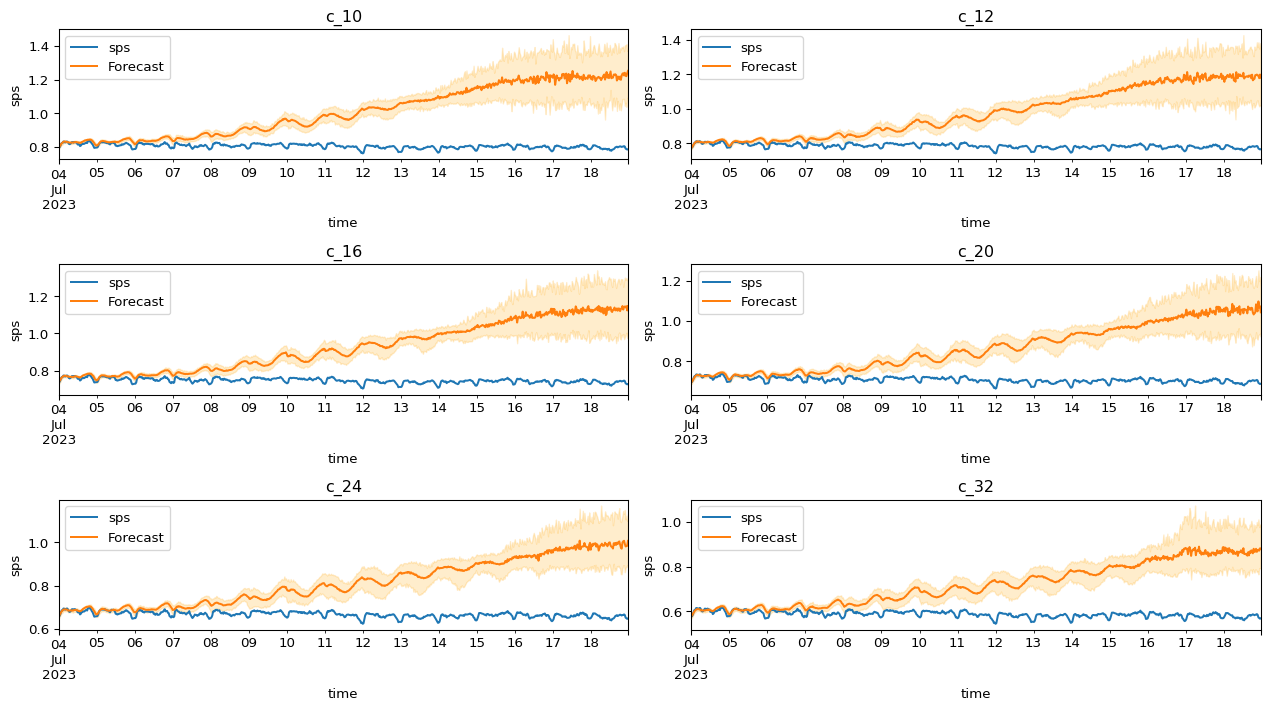

In [233]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,2, figsize=(1280/96, 720/96), dpi=96)
#fig, ax = plt.subplots(3, figsize=(1280/96, 720/96), dpi=96)

ax = ax.flatten()
for ax_ ,family in enumerate(all_preds['type'].unique()[:6]):
    p_ = all_preds.loc[all_preds['type'] == family]
    p_.plot(x='time', y='sps', ax=ax[ax_], label='sps')
    p_.plot(x='time', y='pred', ax=ax[ax_], label='Forecast')
    ax[ax_].fill_between(p_['time'].values, p_['p10'], p_['p90'], alpha=0.2, color='orange')
    ax[ax_].set_title(family)
    ax[ax_].legend()
    ax[ax_].set_xlabel('time')
    ax[ax_].set_ylabel('sps')
fig.tight_layout()
plt.savefig('prediction')

## evaluation metrics

In [179]:
print(all_preds)

                    time     type      pred       p10       p90       sps
0    2023-07-11 00:00:00     c_10  0.792260  0.786555  0.797906  0.787106
1    2023-07-11 00:30:00     c_10  0.793229  0.787963  0.798937  0.789099
2    2023-07-11 01:00:00     c_10  0.799555  0.792755  0.805628  0.798564
3    2023-07-11 01:30:00     c_10  0.807460  0.800263  0.814368  0.815003
4    2023-07-11 02:00:00     c_10  0.814303  0.808978  0.819426  0.821480
...                  ...      ...       ...       ...       ...       ...
1723 2023-07-11 21:30:00  r_score  0.850176  0.843179  0.857583  0.847906
1724 2023-07-11 22:00:00  r_score  0.847903  0.840036  0.856896  0.841990
1725 2023-07-11 22:30:00  r_score  0.845536  0.839390  0.851642  0.840018
1726 2023-07-11 23:00:00  r_score  0.843967  0.835907  0.851099  0.835581
1727 2023-07-11 23:30:00  r_score  0.843549  0.836961  0.852438  0.835581

[1728 rows x 6 columns]


In [212]:
all_preds.to_csv('all_preds_12.csv', index=False)

In [234]:
from gluonts.evaluation.metrics import smape

target = all_preds['sps']
forecast = all_preds['pred']
print(smape(target, forecast))


0.23375457432881055


In [213]:
import pandas as pd

files = ['all_preds_0.csv', 'all_preds_1.csv', 'all_preds_2.csv', 'all_preds_3.csv', 'all_preds_4.csv', 'all_preds_5.csv', 'all_preds_6.csv', 'all_preds_7.csv', 'all_preds_8.csv', 'all_preds_9.csv', 'all_preds_10.csv', 'all_preds_11.csv']

df_list = [pd.read_csv(file) for file in files]
combined_df = pd.concat(df_list, ignore_index=True)

combined_df.to_csv('combined_preds_sps.csv', index=False)


## the workloads

In [52]:
import random
import datetime

def random_choose_a_time():
  # Generate random values for hours, minutes, seconds, and microseconds
  random_hour = random.randint(0, 23)
  random_minute = random.randint(0, 59)
  random_second = random.randint(0, 59)
  random_microsecond = random.randint(0, 999999)

  # Create a datetime object with the randomly generated values
  random_time = datetime.datetime(
      year=1, month=1, day=1,
      hour=random_hour, minute=random_minute,
      second=random_second
  )

  #print("Randomly chosen time:", random_time.time())
  return str(random_time.time())


In [53]:
import pandas as pd

In [54]:
def change_time(old_timestamp):
  return '2023-07'+ old_timestamp[7:11] + random_choose_a_time()

In [55]:
workloads = pd.read_csv('multi_nodes_workloads.csv', header=0)
#workloads
df = workloads[['start_time']]
df = df.applymap(change_time)
df

,start_time
0,2023-07-04 06:44:18
1,2023-07-04 20:19:27
2,2023-07-04 21:46:22
3,2023-07-04 05:12:44
4,2023-07-04 04:00:59
...,...
1162,2023-07-07 14:33:05
1163,2023-07-07 21:30:43
1164,2023-07-07 15:15:53
1165,2023-07-15 00:45:15


In [58]:
s = set()
for t in list(df['start_time']):
  cur = t[:10]
  s.add(cur)

s

{'2023-07-04', '2023-07-05', '2023-07-06', '2023-07-07', '2023-07-15'}

In [13]:
workloads.columns = ['job_id', 'name', 'instance_type', 'number', 'start_time', 'elapsed_time']

In [15]:
workloads_watt = pd.read_csv('workloads_watt.csv', header=0)

In [16]:
def add_watt(name):
  return float(workloads_watt[name])

In [17]:
workloads_name = workloads[['name']]
workloads_with_watt = workloads_name.applymap(add_watt)
workloads_with_watt.columns = ['watt']
workloads_with_watt

,watt
0,88.547481
1,123.408765
2,170.020106
3,244.992355
4,316.995485
...,...
1162,217.384610
1163,403.682409
1164,289.252373
1165,169.551203


In [19]:
workloads_watt = pd.read_csv('workloads_watt.csv', header=0)
float(workloads_watt['8_m4.large_naive-bayes_spark1.5_huge_1'])


101.42652930609133

In [20]:
rest_df = workloads[['job_id', 'elapsed_time']]
rest_df

,job_id,elapsed_time
0,1,1131.335000
1,2,2647.966331
2,3,574.802000
3,4,1403.177583
4,5,322.958000
...,...,...
1162,1163,2723.601000
1163,1164,1237.078109
1164,1165,404.172000
1165,1166,3948.893000


In [21]:
workloads

,job_id,name,instance_type,number,start_time,elapsed_time
0,1,8_c4.large_wordcount_hadoop_huge_1,c4.large,8,2018-01-04 05:20:53,1131.335000
1,2,8_c4.large_regression_spark1.5_huge_1,c4.large,8,2018-01-04 05:22:52,2647.966331
2,3,8_c4.xlarge_wordcount_hadoop_huge_1,c4.xlarge,8,2018-01-04 05:26:14,574.802000
3,4,8_c4.xlarge_regression_spark1.5_huge_1,c4.xlarge,8,2018-01-04 05:28:13,1403.177583
4,5,8_c4.2xlarge_wordcount_hadoop_huge_1,c4.2xlarge,8,2018-01-04 05:30:51,322.958000
...,...,...,...,...,...,...
1162,1163,16_m4.xlarge_lr_spark_bigdata_1,m4.xlarge,16,2018-01-07 20:45:53,2723.601000
1163,1164,16_m4.xlarge_kmeans_spark1.5_bigdata_1,m4.xlarge,16,2018-01-07 20:48:37,1237.078109
1164,1165,16_m4.xlarge_pagerank_spark_bigdata_1,m4.xlarge,16,2018-01-07 21:19:31,404.172000
1165,1166,8_c4.2xlarge_lr_spark_bigdata_1,c4.2xlarge,8,2018-01-15 09:09:42,3948.893000


In [22]:
def calculate_time(time_s):
  return time_s/1800

In [23]:
time_df = workloads['elapsed_time'].apply(calculate_time)
time_df = pd.DataFrame(time_df)
time_df.columns = ['processed_time']
print(time_df)

      processed_time
0           0.628519
1           1.471092
2           0.319334
3           0.779543
4           0.179421
...              ...
1162        1.513112
1163        0.687266
1164        0.224540
1165        2.193829
1166        0.490828

[1167 rows x 1 columns]


In [24]:
def return_type(x):
  temp = x.split('_')
  return temp[1][:1] + '_' + temp[0]

In [25]:
type_df = workloads[['name']]
type_df = type_df['name'].apply(return_type)
type_df = pd.DataFrame(type_df)
type_df.columns = ['type']

In [26]:
print(type_df)

      type
0      c_8
1      c_8
2      c_8
3      c_8
4      c_8
...    ...
1162  m_16
1163  m_16
1164  m_16
1165   c_8
1166  r_10

[1167 rows x 1 columns]


In [27]:
workloads_df = pd.concat([df, type_df, rest_df, time_df, workloads_with_watt], axis=1)
workloads_df

,start_time,type,job_id,elapsed_time,processed_time,watt
0,2023-07-04 02:30:51,c_8,1,1131.335000,0.628519,88.547481
1,2023-07-04 19:11:30,c_8,2,2647.966331,1.471092,123.408765
2,2023-07-04 21:28:33,c_8,3,574.802000,0.319334,170.020106
3,2023-07-04 18:07:28,c_8,4,1403.177583,0.779543,244.992355
4,2023-07-04 10:44:31,c_8,5,322.958000,0.179421,316.995485
...,...,...,...,...,...,...
1162,2023-07-07 00:20:31,m_16,1163,2723.601000,1.513112,217.384610
1163,2023-07-07 23:28:14,m_16,1164,1237.078109,0.687266,403.682409
1164,2023-07-07 04:01:24,m_16,1165,404.172000,0.224540,289.252373
1165,2023-07-15 20:20:59,c_8,1166,3948.893000,2.193829,169.551203


In [ ]:
from datetime import datetime, timedelta

def find_nearest_hour_or_half_hour(target_time):
    flag = 0
    if int(target_time.split(':')[1]) == 30 or int(target_time.split(':')[1]) == 0:
      target_time = datetime.strptime(target_time, "%Y-%m-%d %H:%M:%S")
      return target_time
    elif int(target_time.split(':')[1]) > 30:
      flag = 1


    target_time = datetime.strptime(target_time, "%Y-%m-%d %H:%M:%S")
    if flag == 0:
      nearest_hour = (target_time.replace(minute=0, second=0, microsecond=0))
      nearest_half_hour = (target_time.replace(minute=30, second=0, microsecond=0))
    if flag == 1:
      nearest_hour = (target_time.replace(minute=0, second=0, microsecond=0) + timedelta(hours=1))
      nearest_half_hour = (target_time.replace(minute=30, second=0, microsecond=0))


    print(nearest_hour)
    print(nearest_half_hour)

    diff_to_hour = (target_time - nearest_hour).seconds if nearest_hour < target_time else (nearest_hour - target_time).seconds
    print('diff_to_hour', diff_to_hour)
    diff_to_half_hour = (target_time - nearest_half_hour).seconds if nearest_half_hour < target_time else (nearest_half_hour - target_time).seconds
    print('diff_to_half_hour', diff_to_half_hour)

    if diff_to_hour < diff_to_half_hour:
        return nearest_hour
    else:
        return nearest_half_hour

nearest_time = find_nearest_hour_or_half_hour("2023-08-12 17:01:00")
print("nearest_half/whole hour:", nearest_time)

2023-08-12 17:00:00
2023-08-12 17:30:00
diff_to_hour 60
diff_to_half_hour 1740
nearest_half/whole hour: 2023-08-12 17:00:00


In [28]:
workloads_df.to_csv('processed_workloads.csv', index=False)

## carbon intensity data

In [ ]:
import pandas as pd

In [ ]:
ci_data_raw = pd.read_csv('Carbon_Intensity_Data.csv', header=0)
ci_data_raw

,Datetime (UTC),Actual Carbon Intensity (gCO2/kWh),Forecast Carbon Intensity (gCO2/kWh),Index
0,2023-07-01T00:00Z,85,69,low
1,2023-07-01T00:30Z,82,64,low
2,2023-07-01T01:00Z,83,78,low
3,2023-07-01T01:30Z,83,69,low
4,2023-07-01T02:00Z,81,73,low
...,...,...,...,...
1388,2023-07-29T22:00Z,95,101,low
1389,2023-07-29T22:30Z,90,95,low
1390,2023-07-29T23:00Z,92,89,low
1391,2023-07-29T23:30Z,96,78,low


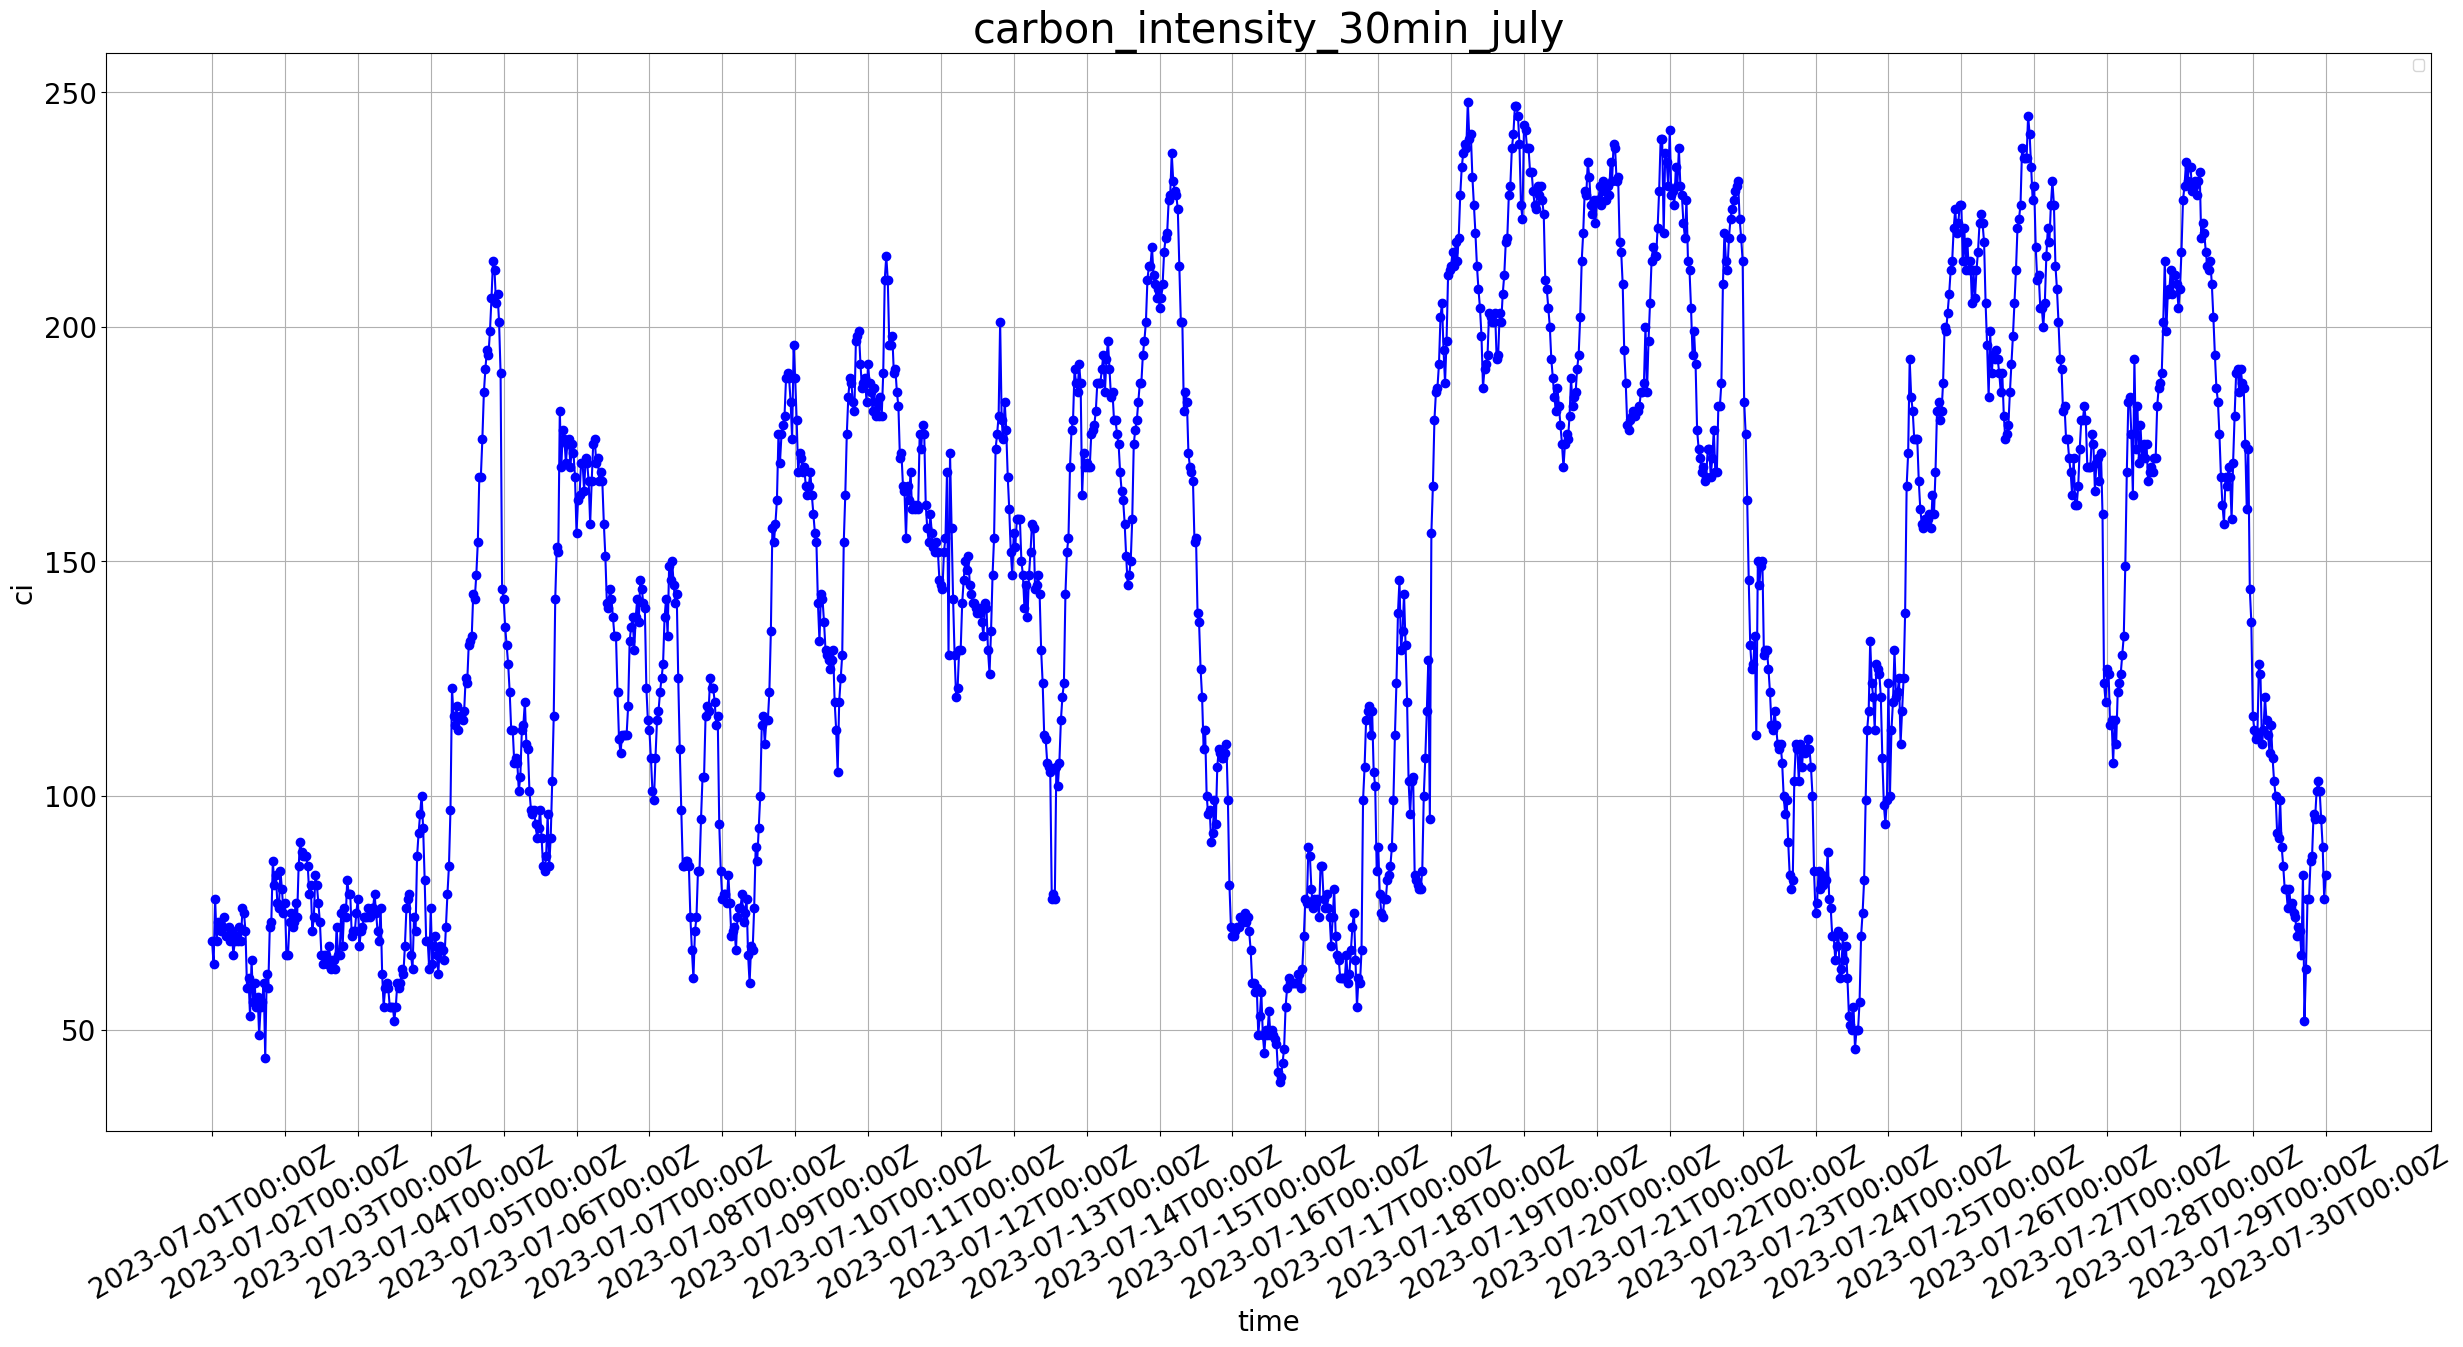

In [ ]:
import matplotlib.pyplot as plt

x = list(ci_data_raw['Datetime (UTC)'])
y = list(ci_data_raw['Forecast Carbon Intensity (gCO2/kWh)'])
plt.figure(figsize=(30, 14))
plt.plot(x, y, marker='o', linestyle='-', color='b')

plt.title('carbon_intensity_30min_july', fontsize=30)
plt.xlabel('time', fontsize=20)
plt.ylabel('ci', fontsize=20)
plt.yticks([50, 100, 150, 200, 250], fontsize=20)
plt.xticks(x[::48], rotation=30, fontsize=20)

plt.grid(True)

plt.legend()

plt.show()



In [ ]:
ci_data = ci_data_raw[['Datetime (UTC)', 'Actual Carbon Intensity (gCO2/kWh)', 'Forecast Carbon Intensity (gCO2/kWh)']]
ci_data.columns = ['time', 'actual', 'forecast']
ci_data

,time,actual,forecast
0,2023-07-01T00:00Z,85,69
1,2023-07-01T00:30Z,82,64
2,2023-07-01T01:00Z,83,78
3,2023-07-01T01:30Z,83,69
4,2023-07-01T02:00Z,81,73
...,...,...,...
1388,2023-07-29T22:00Z,95,101
1389,2023-07-29T22:30Z,90,95
1390,2023-07-29T23:00Z,92,89
1391,2023-07-29T23:30Z,96,78


In [ ]:
ci_data_temp = ci_data[['actual', 'forecast']]
ci_data_temp

,actual,forecast
0,85,69
1,82,64
2,83,78
3,83,69
4,81,73
...,...,...
1388,95,101
1389,90,95
1390,92,89
1391,96,78


In [ ]:
min_score = ci_data_temp.min().min()
max_score = ci_data_temp.max().max()

print(min_score, max_score)

def min_max_scaling(value):
    scaled_value = (value - min_score) / (max_score - min_score)
    return scaled_value


ci_data_n = ci_data_temp.applymap(min_max_scaling)
ci_data_n.columns = ['actual_level', 'predicted_level']
ci_data_n

39 260


,actual_level,predicted_level
0,0.208145,0.135747
1,0.194570,0.113122
2,0.199095,0.176471
3,0.199095,0.135747
4,0.190045,0.153846
...,...,...
1388,0.253394,0.280543
1389,0.230769,0.253394
1390,0.239819,0.226244
1391,0.257919,0.176471


In [ ]:
concatenated_ci = pd.concat([ci_data, ci_data_n], axis=1)
concatenated_ci

,time,actual,forecast,actual_level,predicted_level
0,2023-07-01T00:00Z,85,69,0.208145,0.135747
1,2023-07-01T00:30Z,82,64,0.194570,0.113122
2,2023-07-01T01:00Z,83,78,0.199095,0.176471
3,2023-07-01T01:30Z,83,69,0.199095,0.135747
4,2023-07-01T02:00Z,81,73,0.190045,0.153846
...,...,...,...,...,...
1388,2023-07-29T22:00Z,95,101,0.253394,0.280543
1389,2023-07-29T22:30Z,90,95,0.230769,0.253394
1390,2023-07-29T23:00Z,92,89,0.239819,0.226244
1391,2023-07-29T23:30Z,96,78,0.257919,0.176471


In [ ]:
concatenated_ci.to_csv('ci')

In [ ]:
true = ci_data_n['actual_level']
predict = ci_data_n['predicted_level']
print(smape(true, predict))

0.12496256435082413


## deal with sar data

In [ ]:
import zipfile

# Specify the path to the ZIP file
zip_file_path = '/content/osr_multiple_nodes.zip'
print(zip_file_path)

# Specify the directory where you want to extract the contents
extract_to_directory = '/content/osr_multiple_nodes/'

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all contents to the specified directory
    zip_ref.extractall(extract_to_directory)

print("File(s) extracted successfully.")


/content/osr_multiple_nodes.zip


BadZipFile: ignored